<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week5/Day2/Daily_challenge/Interactive_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
! pip install -k kaggle
from google.colab import files
files.upload()


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -k


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arielwendichansky","key":"35f486beabeea6fcb79285bc7f95d018"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d juhi1994/superstore

100% 0.98M/0.98M [00:00<00:00, 1.12MB/s]
100% 0.98M/0.98M [00:00<00:00, 1.12MB/s]


In [5]:
! unzip 'superstore.zip'

Archive:  superstore.zip
  inflating: US Superstore data.xls  


Data understanding

In [6]:
df = pd.read_excel('US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [8]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
cdata = df.copy()


In [10]:
cdata = cdata.drop(columns='Row ID')

Checking missing

In [11]:
# Check for missing values
cdata.isna().sum()


Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
cdata.duplicated().sum()
cdata = cdata.drop_duplicates()

In [13]:
cdata.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Eliminate outliers

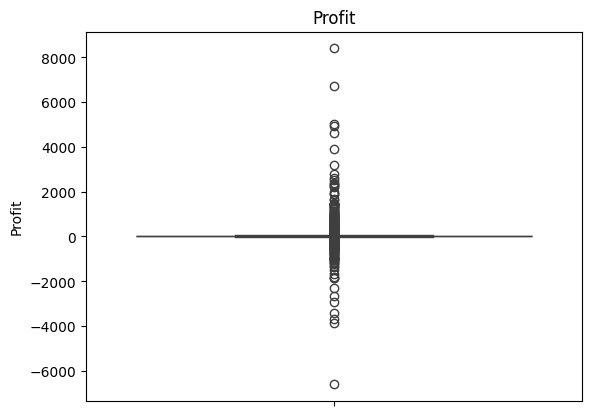

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of score through box plot, checking no outliers
sns.boxplot(data=cdata,y='Profit')

plt.title('Profit')
plt.show()

Is possible to see that there some outliers in the dataset

In [15]:
Q1 = cdata['Profit'].quantile(0.25)
Q3 = cdata['Profit'].quantile(0.75)
IQR = Q3 - Q1
# Defining lower bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Getting clean data
cdata = cdata[(cdata['Profit'] >= lower_bound) & (cdata['Profit'] <= upper_bound)]
cdata.shape

(8112, 20)

Data Visualization with Plotly:
Create an interactive line chart to show sales trends over the years

In [51]:

# Aggregate sales data by year
cdata['Order_year']=cdata['Order Date'].dt.year
sales_by_year = cdata.groupby('Order_year')['Sales'].sum().reset_index()

# Create the line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=sales_by_year['Order_year'], y=sales_by_year['Sales'], mode='lines+markers', name='Sales'))
fig.update_layout(title='Total Sales Trends Over the Years',
                  xaxis_title='Year',
                  yaxis_title='Total Sales')

# Show the chart
fig.show()

There was a continue growth in sales, 2017 is the top year for sales.

Build an interactive map to visualize sales distribution by country.



In [ ]:
import plotly.express as px


# Plot the map
fig = px.choropleth(data_frame=cdata,
                    locations='Country',
                    locationmode='country names',
                    color='Sales',
                    color_continuous_scale='Viridis',
                    title='Sales Distribution by Country')
fig.update_geos(showcountries=True)
fig.show()

Data Visualization with Plotnine:
Use Plotnine to generate a bar chart showing top 10 products by sales.

In [65]:
top_10_product = cdata.groupby(['Product Name'])['Sales'].sum().reset_index()

In [91]:
#Filter the top 10 products with the highest Sales

top_10_product = top_10_product.nlargest(10, ['Sales'])
top_10_products = top_10_product.sort_values(by='Sales', ascending=False)
top_10_product

,Product Name,Sales
721,HON 5400 Series Task,6729.408
1422,Tennsco Snap-Togethe,4471.680
1101,Office Star - Profes,4211.760
1423,Tennsco Stur-D-Stor,4059.300
694,Global Leather Highb,4039.698
678,Global Commerce Seri,3957.492
395,Chromcraft Round Con,3834.380
1243,SAFCO Arco Folding C,3756.320
1421,Tennsco Single-Tier,3753.400
455,DMI Eclipse Executiv,3632.105


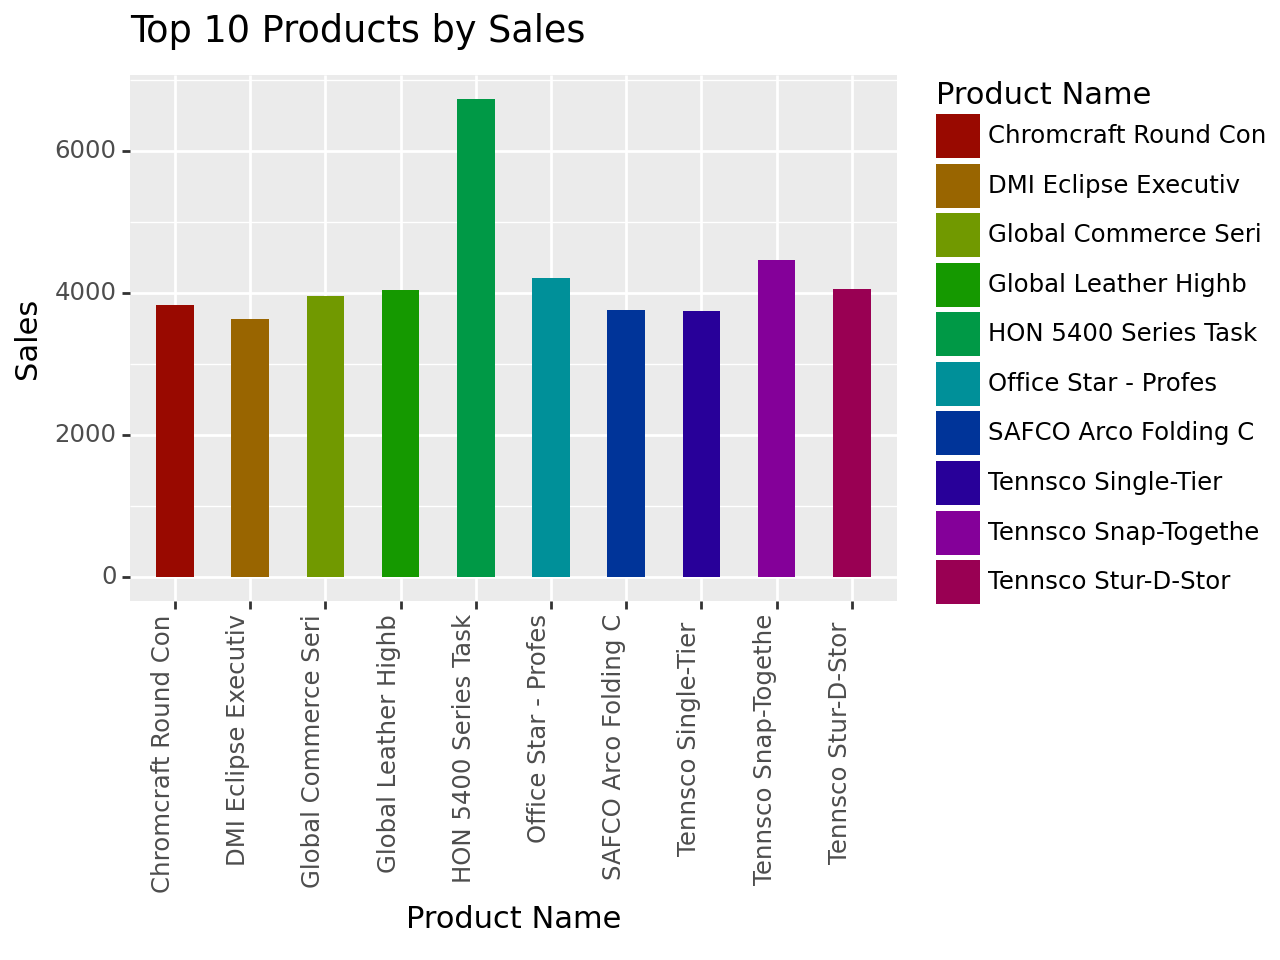

In [92]:
from plotnine import *



top_10_products['Product Name'] = top_10_products['Product Name'].apply(lambda x: x[:20])  # Adjust the number of characters as needed

# Create the bar chart
bar_chart = (
    ggplot(top_10_products, aes(x='Product Name', y='Sales', fill='Product Name'))  # Using 'Product Name' for fill to differentiate colors
    + geom_bar(stat='identity', width=0.5)
    + scale_fill_hue(s=1, l=0.3)  # Adjust saturation and lightness for better color differentiation
    + theme(axis_text_x=element_text(rotation=90, hjust=1))
    + labs(title='Top 10 Products by Sales', x='Product Name', y='Sales')
)

# Print the bar chart
print(bar_chart)

Create a scatter plot to analyze the relationship between profit and discount.



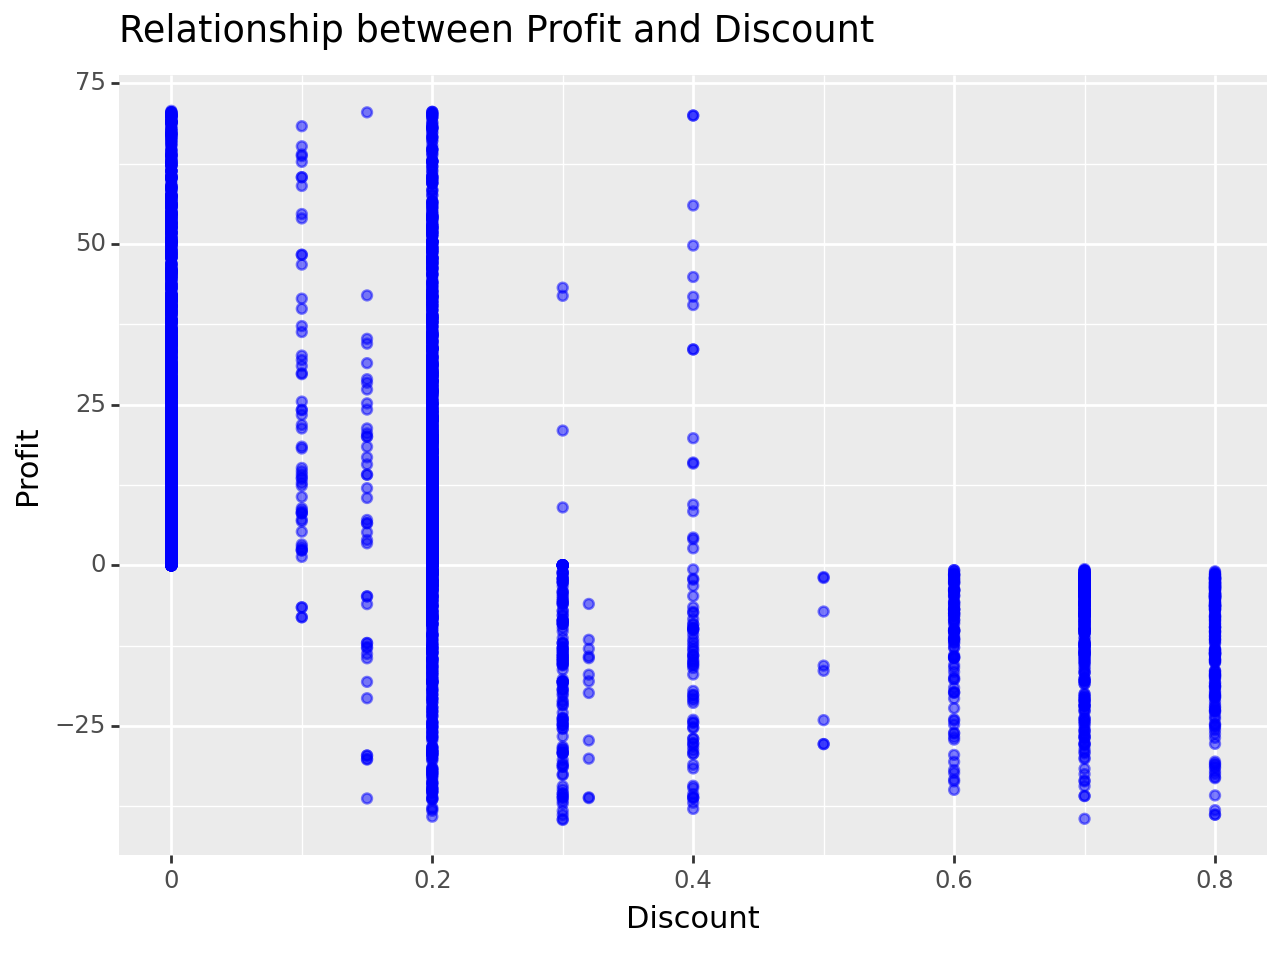

In [93]:
# Create the scatter plot
scatter_plot = (
    ggplot(cdata, aes(x='Discount', y='Profit'))
    + geom_point(color='blue', alpha=0.5)  # Set point color and transparency
    + labs(title='Relationship between Profit and Discount', x='Discount', y='Profit'))
print(scatter_plot)

It can be seen as The discount is higher the profit is lower or even negative.
A range in between 0 to 20 percent of discount can be profitable for the company, but sometimes it can lead to negative results.

<ipython-input-94-9648724ec8bc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


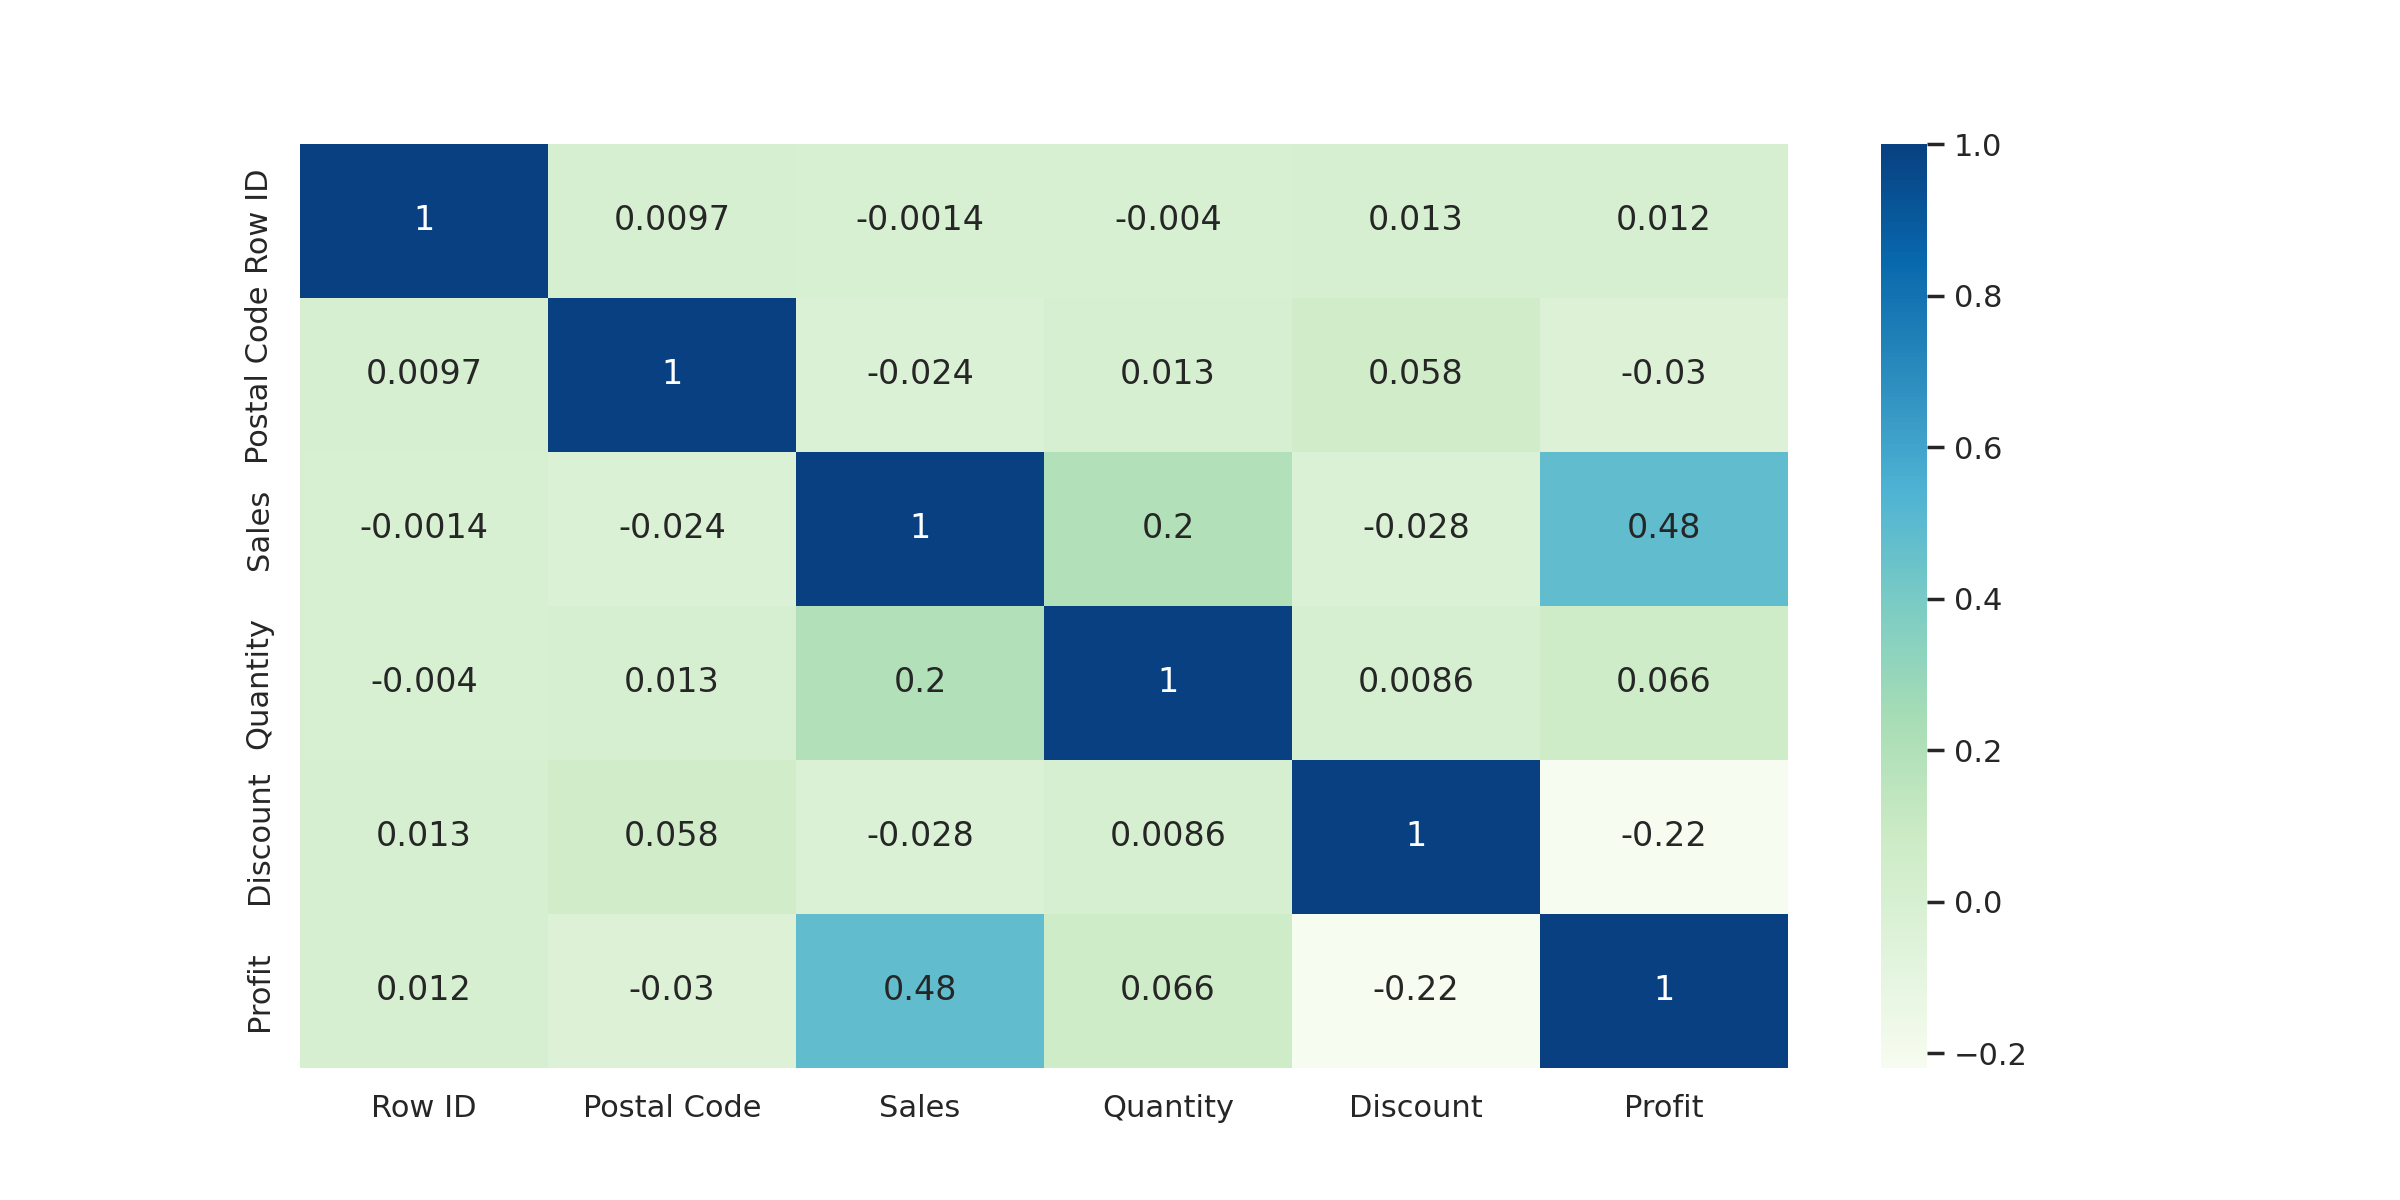

In [94]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'GnBu')

From above heatmap we observed that Profits, Sales and Quantity these features/columns have strong bond, which means any slight change in any of these will impact the business

Comparative Analysis: Compare the insights gained from Plotly and Plotnine visualizations.

Potly visualizations are highly interactive, allowing users to zoom, pan, hover over data points for details, and toggle visibility of specific data series. This interactivity can lead to a more engaging exploration of the data.
Plotline Plotnine is based on the grammar of graphics, which provides a consistent framework for creating visualizations by combining data, aesthetics, and geometric objects. This makes it easier to understand and modify plots.
In summary, Plotly is well-suited for creating interactive web-based visualizations with support for 3D plots and complex interactive features, while Plotnine excels at creating static, publication-quality plots with a focus on the grammar of graphics and flexibility in customization. The choice between Plotly and Plotnine depends on the specific requirements of the analysis and the desired characteristics of the visualizations.
